# Исследование возможных подходов увеличения выручки интернет-магазина

В имеющихся таблицах представлены данные крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
В данном проекте неоходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать полученные результаты. 

**Описание данных**

***Данные для первой части***

***таблица hypothesis.csv***
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

***Данные для второй части*** 

***таблица orders.csv***

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

***таблица visitors.csv***

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Для проверки гипотез для увеличения выручки интерне-магазина необходимо выполнить следующие задачи:

1. проверить и преобразовать исходные данные, сделать соответствие с реальными данными
2. приоритизировать гипотезы, на основе которого будем делать выводы
3. запустить A/B-тест
4. проанализировать полученные результаты
5. сделать выводы

### Часть 1. Предобработка данных.

#### Открыть файл с данными и изучить общую информацию

In [1]:
#Импортируем необходимые для анализа библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import datetime as dt

In [2]:
#Откроем файлы hypothesis.csv, orders.csv, visitors.csv
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

#### Предобработка данных hypothesis

In [3]:
#Выведем первые строки датафрейма hypothesis.csv
pd.set_option('display.max_colwidth', None)
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
#Рассмотрм основную информацию
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#Проверим наличие пустых ячеек
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [6]:
#Приведем данные к змеинному регистру
hypothesis = hypothesis.rename(columns={'Hypothesis' : 'hypothesis',
                                        'Reach' : 'reach',
                                        'Impact' : 'impact',
                                        'Confidence' : 'confidence',
                                        'Efforts' : 'efforts'})

In [7]:
#Рассмотрм основную информацию
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


#### Предобработка данных orders

In [8]:
#Выведем первые строки датафрейма orders.csv
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
#Рассмотрм основную информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
#Проверим наличие пустых ячеек
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
#Преобразуем данные
orders['date'] = pd.to_datetime(orders['date'])
orders['revenue'] = orders['revenue'].astype('float')

In [12]:
#Рассмотрм основную информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


#### Предобработка данных visitors

In [13]:
#Выведем первые строки датафрейма visitors.csv
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
#Рассмотрм основную информацию
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
#Проверим наличие пустых ячеек
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [16]:
#Преобразуем данные
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
#Рассмотрм основную информацию
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Вывод: данные в полной мере соответствуют требованиям для выполнения анализа проведенного теста.

Таблица hypothesis используется для приоритизации гипотез.
Таблицы visitors и orders используются для анализа полученных в результатае тестирования данных и формирования выводов о успешности/неуспешности теста.

Данные в таблицах приведены к нужным форматам и регистрам, проверены на наличие пропусков.

### Часть 2. Приоритизация гипотез.

***ICE и RICE***

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:
ICE = (Impact * Confidence) / Efforts

У этого метода есть модификация RICE (R от англ. reach, «охват»):

RICE = (Reach * Impact * Confidence) / Efforts


#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [18]:
hypothesis.index = np.arange(1, len(hypothesis) + 1)
hypothesis['ICE'] = round(((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']),2)

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы: 9, 1, 8

9) Запустить акцию, дающую скидку на товар в день рождения,

1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,

8) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 

#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [19]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы: 8, 3, 1, 7

8) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,

3) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,

1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,

7) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. 

#### Изменение приоритизации гипотез при применении RICE вместо ICE

In [20]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


Наиболее перспективные гипотезы по ICE: 

- Запустить акцию, дающую скидку на товар в день рождения (9 гипотеза),

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (1 гипотеза),

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (8 гипотеза). 

Наиболее перспективные гипотезы по RICE: 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (8 гипотеза),

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (3 гипотеза),

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (1 гипотеза),

- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (7 гипотеза). 

По RICE имеются значительные различия с ICE. Так получилось, потому что 
- параметр Reach для гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"  равен 10, 
- Reach для "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" равен 5 при этом наблюдается высокий уровнень уверенности в гипотезе, 
- Reach для "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" равен 8, 
- Reach для "Запустить акцию, дающую скидку на товар в день рождения" равен 1, при этом и влияние рано 9, и уверенность в результате равна 9, 
- а для "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" Reach равен 3 в то время как влияние равно 10

Для выбора конкретной гипотезы для тестирования лучше выбирать ее из гипотез:

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (имеет высокий уровеь влияния) и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (имеет достаточно высокий уровень охвата).

### Часть 3. Анализ A/B-теста

#### Построим график кумулятивной выручки по группам. Сделать выводы и предположения.

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [22]:
#  агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                           orders['group'] == x['group'])]\
                           .agg({'date' : 'max', 
                                 'group' : 'max', 
                                 'transactionId' : 'nunique', 
                                 'visitorId' : 'nunique', 
                                 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

In [23]:
# агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                               visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 
                                   'group' : 'max', 
                                   'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )

In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579.0,719
1,2019-08-01,B,21,20,101217.0,713
2,2019-08-02,A,44,38,242401.0,1338
3,2019-08-02,B,45,43,266748.0,1294
4,2019-08-03,A,68,62,354874.0,1845


In [25]:
#Определим минимальную и максимальную даты исходной таблицы orders
print((orders['date'].min()).date())
print(orders['date'].max().date())

2019-08-01
2019-08-31


In [26]:
#Определим минимальную и максимальную даты исходной таблицы visitors
print(visitors['date'].min().date())
print(visitors['date'].max().date())

2019-08-01
2019-08-31


In [27]:
#Сравним полученные данные о минимальной и максимальной датах с датами cummulativeData
print(cumulativeData['date'].min().date())
print(cumulativeData['date'].max().date())

2019-08-01
2019-08-31


Исходные данные представлены за период с 2019-08-01 по 2019-08-31 при формировании датафрейма cummulativeData записи соответствуют "сырым" данным.

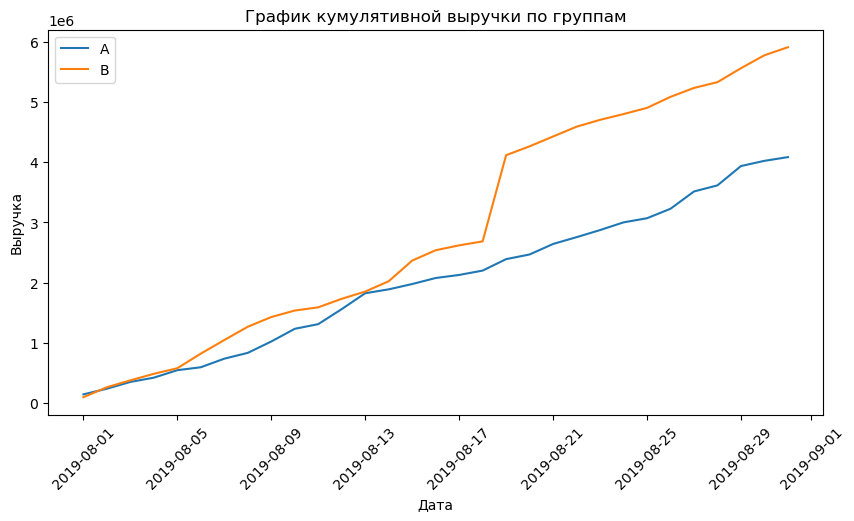

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')  # название графика
plt.xlabel('Дата')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Выручка')   # название оси Y
plt.legend();

Выручка увеличивается в течение всего теста. Для теста А выручка увеличивается равномерно.

Однако для теста В наблюдается резкий скачек.  Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

Необходимо проанализировать выбросы.

#### Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

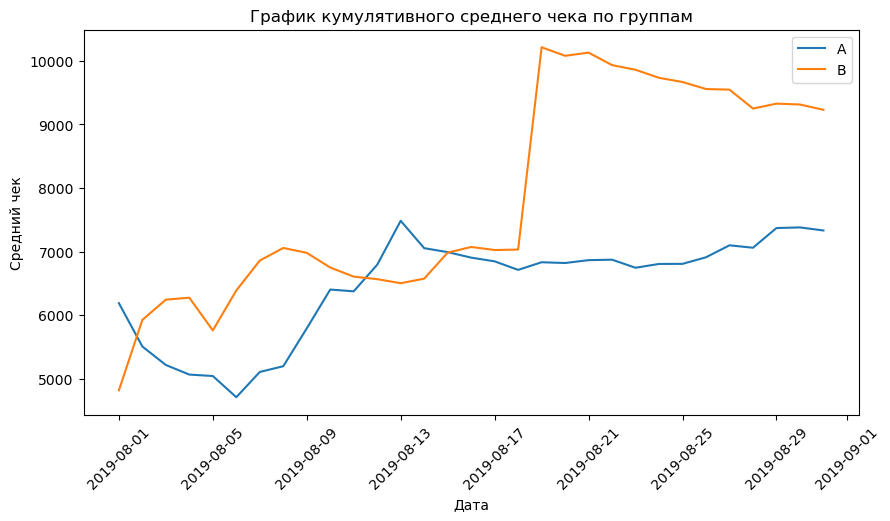

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')  # название графика
plt.xlabel('Дата')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Средний чек')   # название оси Y
plt.legend();

Средний чек имеет значительное расхождение ближе к концу теста: установился для группы A и продолжает падать для группы B. 

Данная ситуация получается из значительного всплеска по данным о выручке, который мог произойти из-за наличия аномалий в данных. Также возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. 

Для обоих графиков наблюдаются увеличиения и падение значения среднего чека. 

#### Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

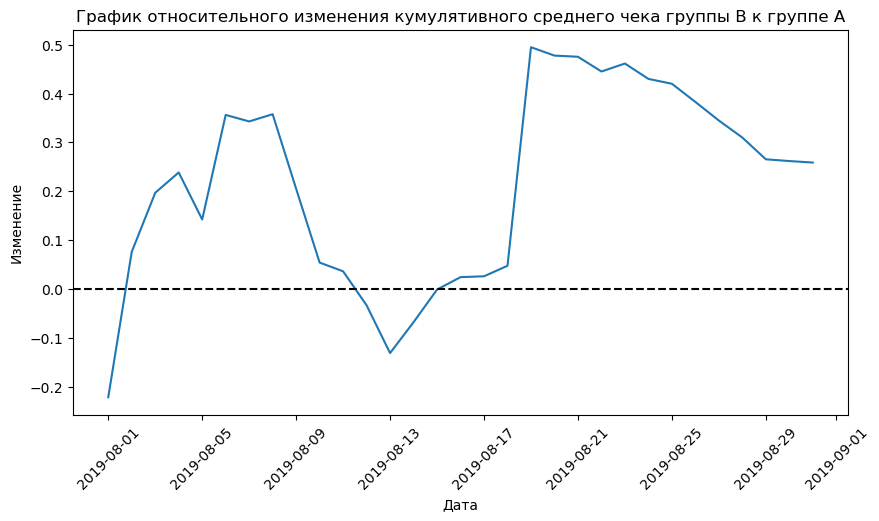

In [30]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
                                           mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']
                                                                                /mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')  # название графика
plt.xlabel('Дата')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Изменение')   # название оси Y
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет». Средниий чек для группы тестирования В имеет сильные скачки и перепады, чем обусловлен полученный график. Также можно сказать, что средний чек по группе тестирования В был выше практически на всем промежутке тестирования, за исключением начала и резкого раста среднего чека группы А в середине теста.

Необходимо провести анализ анамалий.

#### Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

In [31]:
#Сформируем данные для гафика и дальнейшего применения при проведении проверки гипотез.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24         148579.0              21   
1 2019-08-02              20          93822.0              24   
2 2019-08-03              24         112473.0              16   
3 2019-08-04              16          70825.0              17   
4 2019-08-05              25         124218.0              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0         101217.0                  24             148579.0   
1         165531.0                  44             242401.0   
2         114248.0                  68             354874.0   
3         108571.0                  84             425699.0   
4          92428.0                 109             549917.0   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21             101217.0               719   
1                  45             266748.0               619   
2                  61             3809

In [32]:
# Формируем данные по пользователям 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [33]:
# Объединяем полученные данные
categoryA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

categoryB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


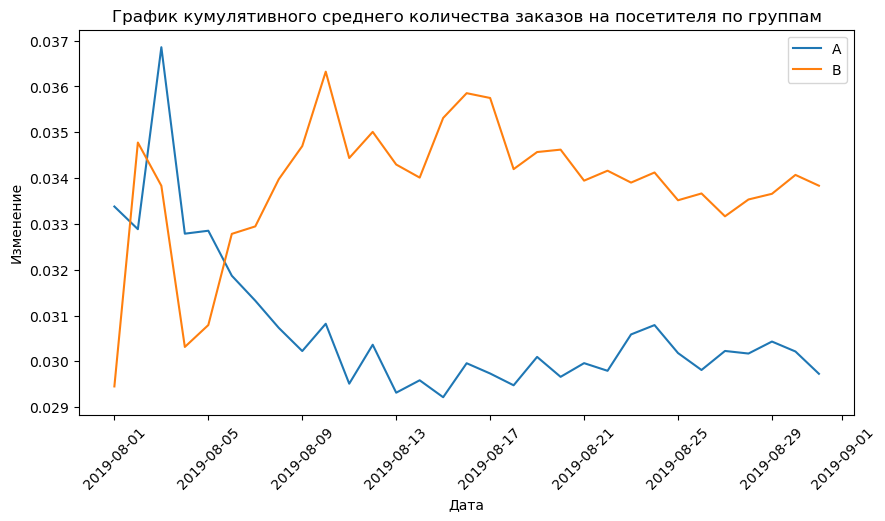

In [34]:
plt.figure(figsize=(10, 5))

# Строим график среднего количества заказов на посетителя группы А
plt.plot(data['date'], data['ordersCummulativeA'] / data['visitorsCummulativeA'], label='A')

# Строим график среднего количества заказов на посетителя выручки группы B
plt.plot(data['date'], data['ordersCummulativeB'] / data['visitorsCummulativeB'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')  # название графика
plt.xlabel('Дата')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Изменение')   # название оси Y

plt.legend();

По полученным даннм можно сказать, что для группы тетирования В среднее количество заказов на пользователя выше на большей части графика, что может быть результатом некорректных данных или наличия выбросов. Также наблюдается сильный скачек для группы А в начале тестирования (для группы В также замечен скачек, но показатель значительно меньше), возможными причинами могут быть сезонные потребности (допустим как канцелярия к 1 сентября) или же наличие аномалий.

Необходимо изучить данные в разрезе по количеству заказов на пользователя и при наличии аномалий их исключить.

#### Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

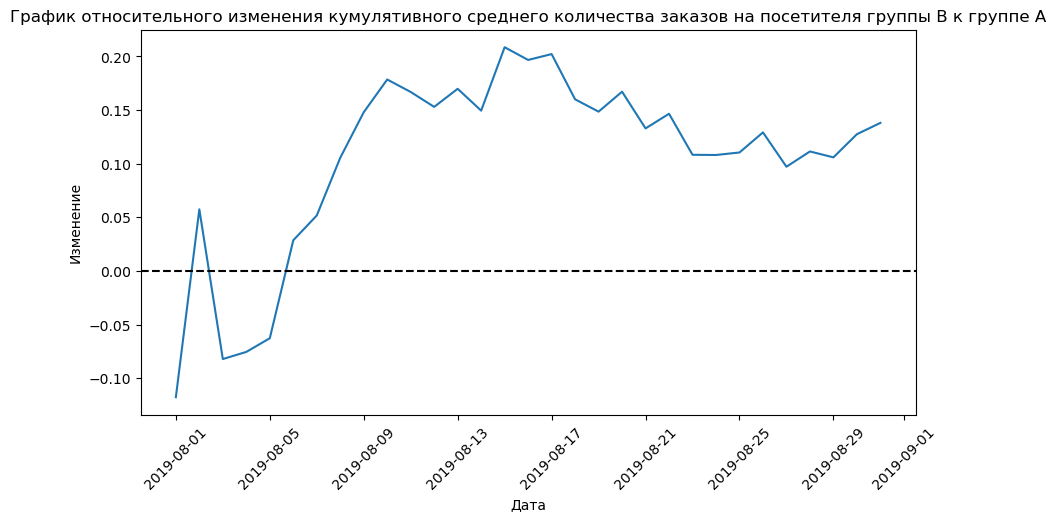

In [35]:
plt.figure(figsize=(10, 5))

# cтроим отношение среднего количества заказов 
plt.plot(data['date'], (data['ordersCummulativeB'] / data['visitorsCummulativeB'])/
         (data['ordersCummulativeA'] / data['visitorsCummulativeA'])-1)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A') # название графика
plt.xlabel('Дата')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Изменение')   # название оси Y

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Как было отмечено ранее, для группы В показатель среднего количества заказов на пользователя в среднем значительно привышает показатель по группе А, который выше только на промежутке резкого падения показателей обоих графиков в первой половине тестирования.

#### Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

In [36]:
#Подсчитаем количество заказов по пользователям и посмотрим на результат:

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


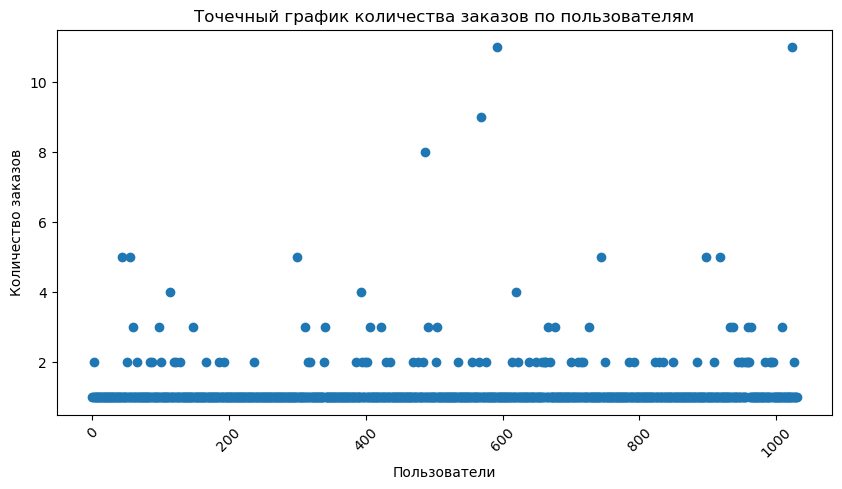

In [37]:
# Рассмотрим количкство заказов на пользователя на графике
plt.figure(figsize=(10, 5))
plt.title('Точечный график количества заказов по пользователям') # название графика
plt.xlabel('Пользователи')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Количество заказов')   # название оси Y
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']);

Для некоторых пользователей имеются 8, 9 и 11 заказов, что является аномалиями. В дальнейшем анализе исключим эти значения для получения более корретного вида данных.

#### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

In [38]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Для дальнейшего рассмотрения считаю более корректным взять данные по 95 процентилю. При рассмотрении 95 процентиля будет урезано количество заказов 3 и 4, которые в свою очередь могут быть истинными и не относится к аномалиям. Но будем отталкиваться от данных, что пользователь не делает более 2 заказов за коротки промежуток времени.

#### Построить точечный график стоимостей заказов. Сделать выводы и предположения.

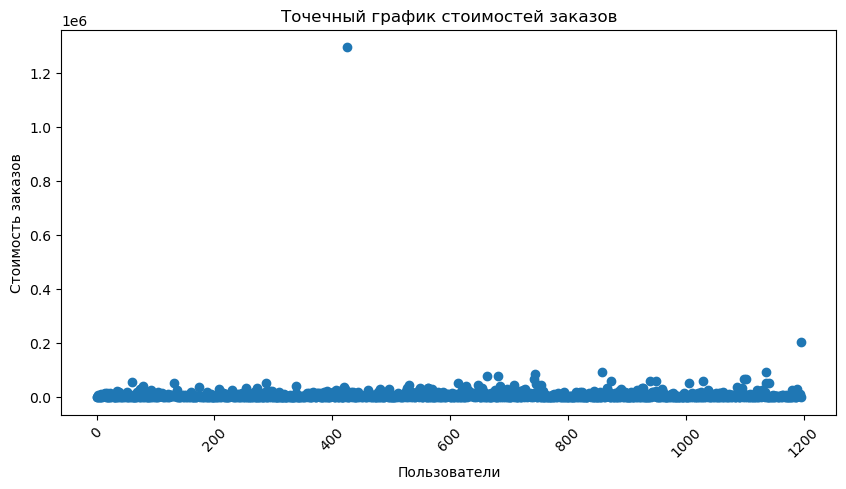

In [39]:
# Рассмотрим стоимости заказов на графике
plt.figure(figsize=(10, 5))
plt.title('Точечный график стоимостей заказов') # название графика
plt.xlabel('Пользователи')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Стоимость заказов')   # название оси Y
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

In [40]:
orders.sort_values(by='revenue', ascending=False).head(5)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500.0,B
1196,3936777065,2108080724,2019-08-15,202740.0,B
858,192721366,1316129916,2019-08-27,93940.0,A
1136,666610489,1307669133,2019-08-13,92550.0,A
744,3668308183,888512513,2019-08-27,86620.0,B


На графике явно выражены аномалии 1294500.0 и 202740.0 которые при дальнейшем рассмотрении следует исключить. 

#### Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Для дальнейшего рассмотрения возьмем 95 процентиль, который исключает выявленные на прошлом этапе аномалии. 

#### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов на посетителя между группами нет. 

Альтернативная: различия в среднем между группами есть.

In [42]:
print("P-value = {0:.3f}".format(stats.mannwhitneyu(categoryA, categoryB)[1]))

print("Относительные различия = {0:.3f}".format(categoryB.mean() / categoryA.mean() - 1))

P-value = 0.017
Относительные различия = 0.138


Вывод: По «сырым» данным есть различия в среднем числе заказов групп A и B. 
Первое число — p-value = 0.017.
При рассмотрении с показателем стат значимости 0.05 (не включающим в себя данные по количеству заказаов 3-4) разница между группами наблюдается.

Так как ранее была определена значимость в 0.05, значит, принимаем альтернативную гипотезу о том, что различия в среднем между группами есть. Относительный проигрыш группы А равен 13.8% — второе число в выводе.

#### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [43]:
print('P-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.729
Относительные различия = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы А значительно ниже среднего чека группы В.

95-й и 99-й перцентили средних чеков равны 28 000 и 58 233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

#### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.

Нулевая: различий в среднем количестве заказов на посетителя между группами нет. 

Альтернативная: различия в среднем между группами есть.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [44]:
# отфильтруем данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего 74 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [45]:
categoryAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

categoryBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [46]:
print('P-value = {0:.3f}'.format(stats.mannwhitneyu(categoryAFiltered, categoryBFiltered)[1]))
print('Относительные различия = {0:.3f}'.format(categoryBFiltered.mean()/categoryAFiltered.mean()-1))

P-value = 0.013
Относительные различия = 0.173


Вывод: Данные после фильтрации практически не изменились. По «очищенным» данным также наблюдаются различия в среднем числе заказов групп A и B. 
Первое число — p-value = 0.013.
При рассмотрении с показателем стат значимости 0.05 (не включающим в себя данные по количеству заказаов 3-4) разница между группами наблюдается.

Так как ранее была определена значимость в 0.05, значит, принимаем альтернативную гипотезу о том, что различия в среднем между группами есть. Относительный проигрыш группы А равен 17.3% — второе число в выводе.

#### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [47]:
print(
    'P-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительные различия = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value = 0.738
Относительные различия = -0.020


P-value уменьшился, но и разница между сегментами уменьшилась с 26% до 2%.

Общие выводы по результатам теста не изменились, но можно отметить большое влияние наличия аномалий в тесте.
Имеющиеся факты:

- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- По составленным графика различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению.

#### Принять решение по результатам теста и объяснить его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

По полученным данным продолжение теста не возымеет результата, так как нет значительной тенденции между группами к выравниванию значений, поэтому необходимо принять решение об остановке теста.

Разлиячия между группами наблюдаются в части количества заказов на пользователя. Фильтрация данных не дала альтерналивного результата. (Если бы при рассмотрении количества заказов на пользователя был взят показатель стат значимости равный 0.01, данные также отличались незначительно, при этом не была отвергнута нулевая гипотеза, что различий нет, хотя значения бы находились в непосредственной близости к показателю стат значимости).

В связи со всем вышеизложенным, по результатам теста следует остановить тест и зафиксировать победу группы В (пункт 1).